<a href="https://colab.research.google.com/github/shuklasid19/Assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task**
aquaculture water quality variables like Temperature, TDS (Total Dissolved Solids), pH, DO (Dissolved Oxygen) obtained from an IoT device at real time over a time period. Can you suggest the best ML model which can predict the DO if other variables like pH, TDS and Temperature are known ?  If yes, can you show the working

we have data set imported into the colab

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/device_data_1.xls')

In [ ]:
df

,Time,Devicename,Temperature,TDS,PH,DO
0,Wed Jul 07 2021 14:15:09 GMT+0530 (India Stand...,867378035207325,29.0625,0.0000,13.61598,9.91
1,Wed Jul 07 2021 14:16:14 GMT+0530 (India Stand...,867378035207325,29.0625,0.0000,13.12313,9.90
2,Wed Jul 07 2021 14:17:18 GMT+0530 (India Stand...,867378035207325,29.0000,0.0000,13.55723,9.90
3,Wed Jul 07 2021 14:18:23 GMT+0530 (India Stand...,867378035207325,29.0625,0.0000,14.00000,9.90
4,Wed Jul 07 2021 14:19:28 GMT+0530 (India Stand...,867378035207325,29.0625,0.0000,14.00000,9.90
...,...,...,...,...,...,...
1145,Wed Jul 28 2021 17:31:18 GMT+0530 (India Stand...,867378035207325,30.0625,127.5950,14.00000,7.84
1146,Wed Jul 28 2021 17:32:23 GMT+0530 (India Stand...,867378035207325,30.0625,125.1168,14.00000,7.16
1147,Wed Jul 28 2021 17:33:28 GMT+0530 (India Stand...,867378035207325,30.1250,141.9695,14.00000,6.79
1148,Wed Jul 28 2021 17:34:32 GMT+0530 (India Stand...,867378035207325,30.1250,142.7360,14.00000,6.50


We will drop two features from the dataset time and devicename which are not important for our model.I had done feature engineering in time feature but found it does not increase the accuracy of the model and dataset is also small so might not be able to learn the pattern.

Temperature TDS PH are our independent variables and DO is the target which we will have to predict.

In [ ]:
#trying to seperate both dependent variable and target variable
x = df[['Temperature',	'TDS'	,'PH']]
y = df['DO']

In [ ]:
#shape of our data set as we can see the dataset is not that big 
#1150 examples and 4 columns including the target variable

In [ ]:
df.shape

(1150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         1150 non-null   object 
 1   Devicename   1150 non-null   int64  
 2   Temperature  1150 non-null   float64
 3   TDS          1150 non-null   float64
 4   PH           1150 non-null   float64
 5   DO           1150 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 54.0+ KB


In [ ]:
#we dont have any missing values
df.isnull().sum()

Time           0
Devicename     0
Temperature    0
TDS            0
PH             0
DO             0
dtype: int64

In [ ]:

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

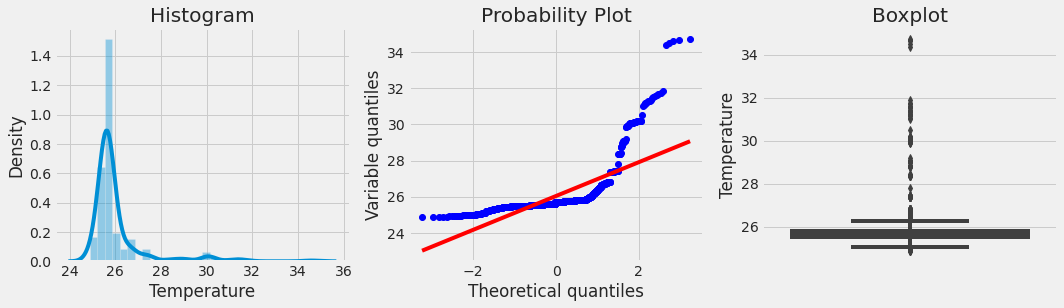

In [ ]:
# let's find outliers in RM
import scipy.stats as stats
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
diagnostic_plots(df, 'Temperature')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


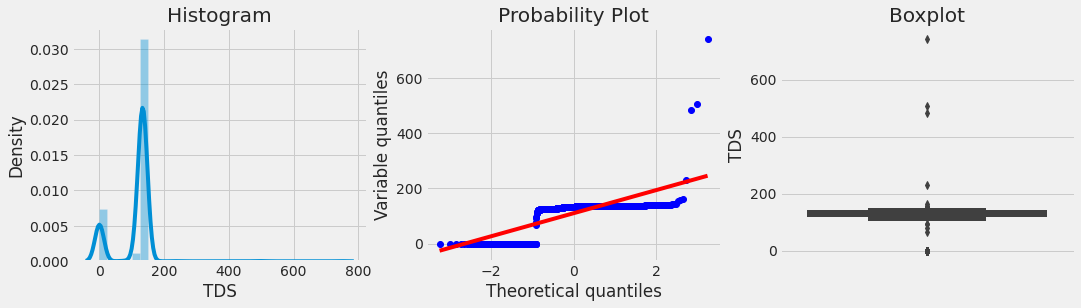

In [ ]:
diagnostic_plots(df, 'TDS')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


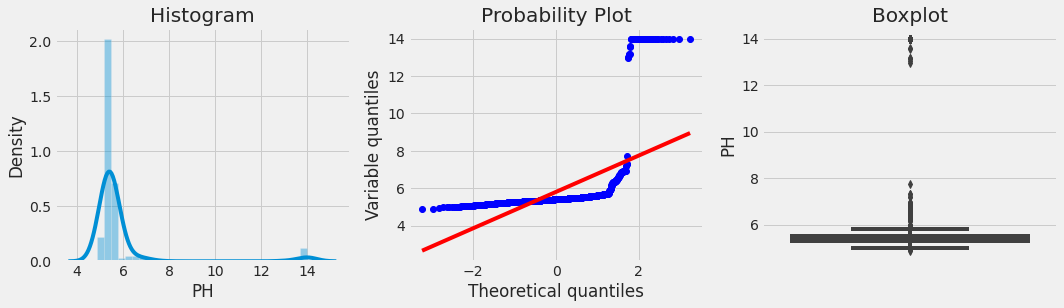

In [ ]:
diagnostic_plots(df, 'PH')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


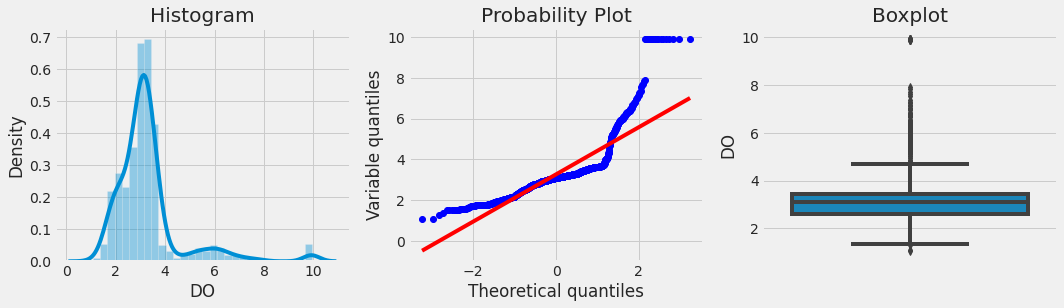

In [ ]:
diagnostic_plots(df, 'DO')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


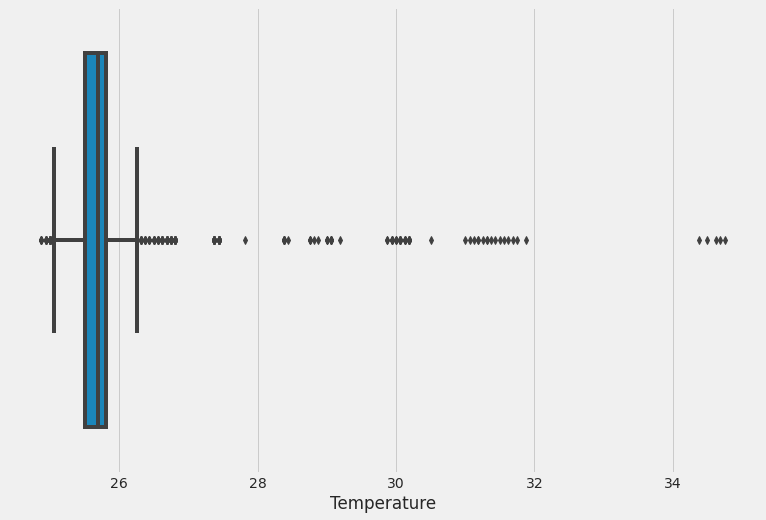

In [ ]:
#we do have outliers which can be problomatic for our model but were not sure about that.
#I have tried multiple ways to tackle with them but the more i tried the accuracy dropped and also we were loosing points 
#which are less anyway so we will train the model with as its given...
plt.figure(figsize=(12, 8))
plt.style.use("fivethirtyeight")
sns.boxplot(df['Temperature'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


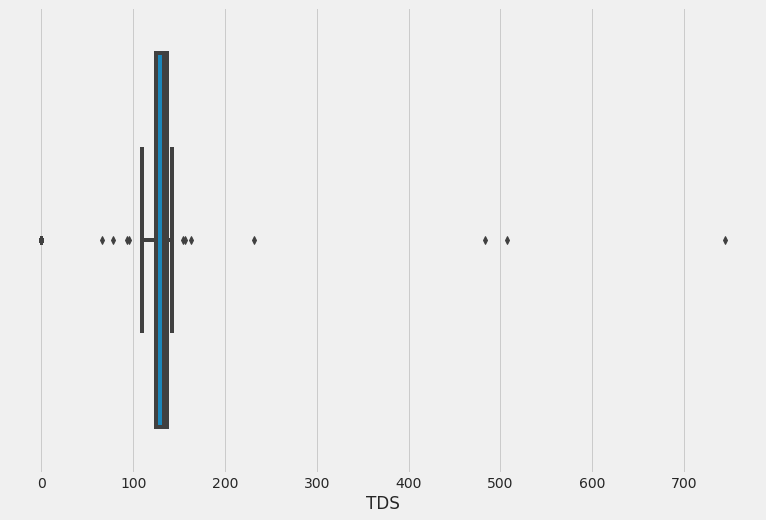

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(df['TDS'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


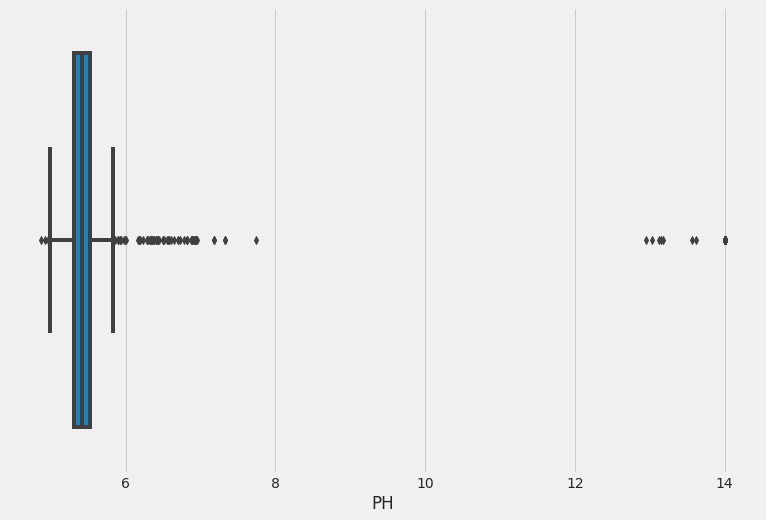

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(df['PH'])
#not much spread in PH and theis feature also contains the outliers same as tds

In [ ]:
#correlation of target and independent variables
#As we can see Temperature and ph are correlated but TDS seems to be neg correlated to target feature DO

In [ ]:
df.corr()

,Devicename,Temperature,TDS,PH,DO
Devicename,1.000000e+00,4.510284e-15,-3.981325e-15,2.064600e-15,-1.382298e-15
Temperature,4.510284e-15,1.000000e+00,1.037492e-01,6.505866e-01,6.692323e-01
TDS,-3.981325e-15,1.037492e-01,1.000000e+00,-6.966701e-03,-2.095057e-01
PH,2.064600e-15,6.505866e-01,-6.966701e-03,1.000000e+00,7.028795e-01
DO,-1.382298e-15,6.692323e-01,-2.095057e-01,7.028795e-01,1.000000e+00


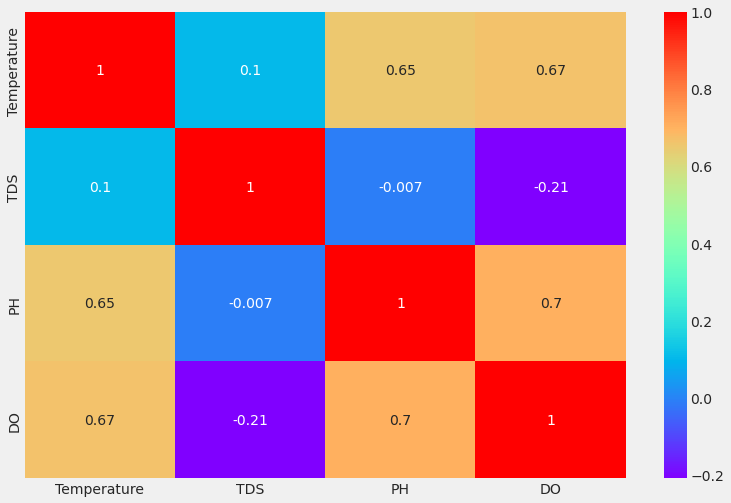

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('Devicename', axis=1).corr(), annot=True, cmap="rainbow")
plt.show()

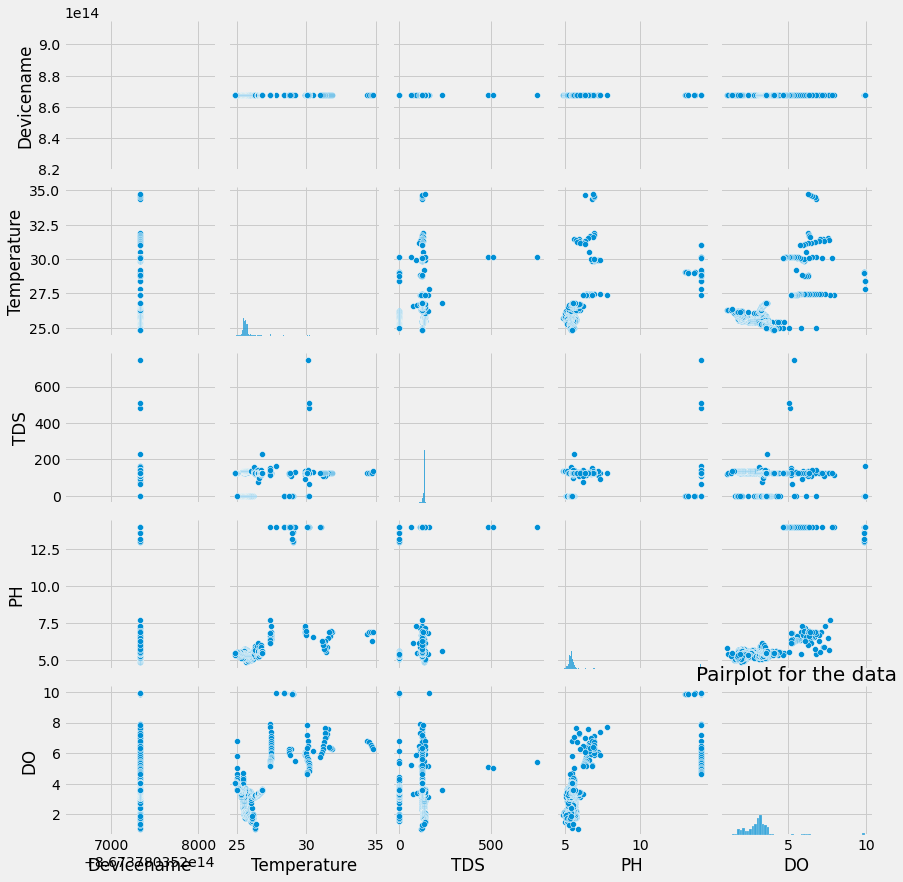

In [ ]:
sns.pairplot(df)
plt.title("Pairplot for the data",fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


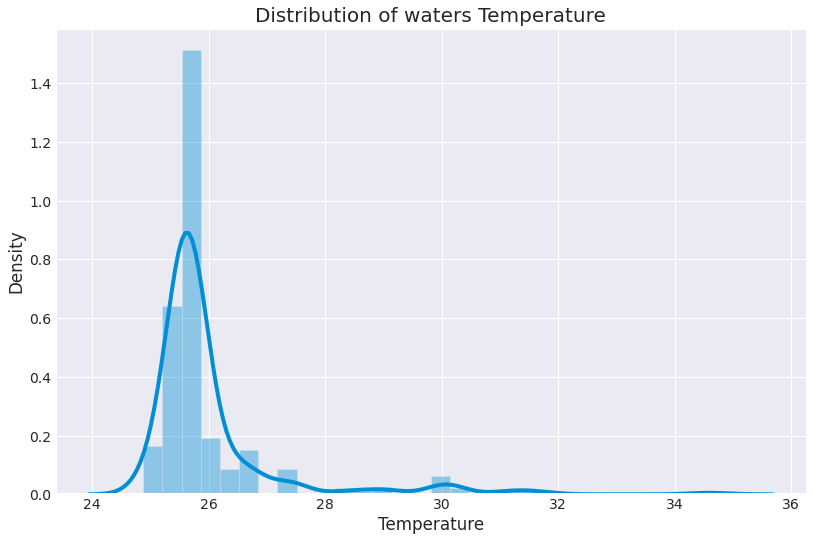

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.distplot(df['Temperature'], bins=30)
plt.title('Distribution of waters Temperature', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


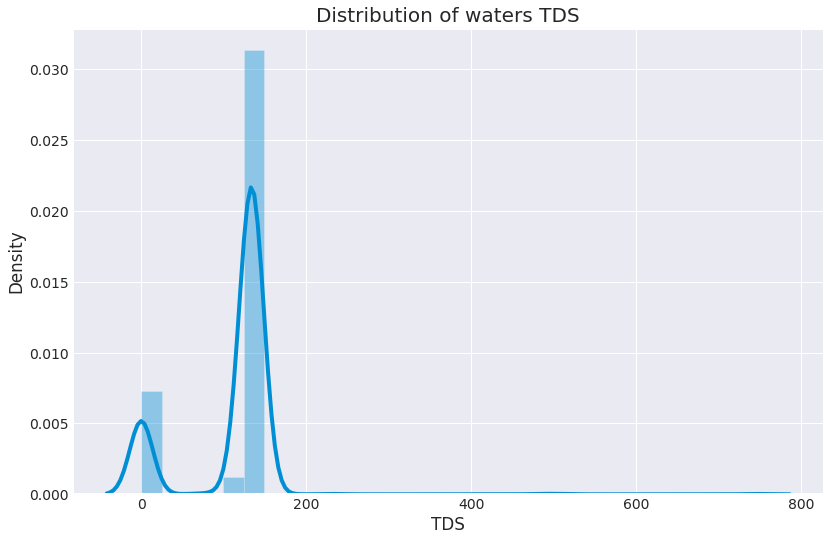

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.distplot(df['TDS'], bins=30)
plt.title('Distribution of waters TDS', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


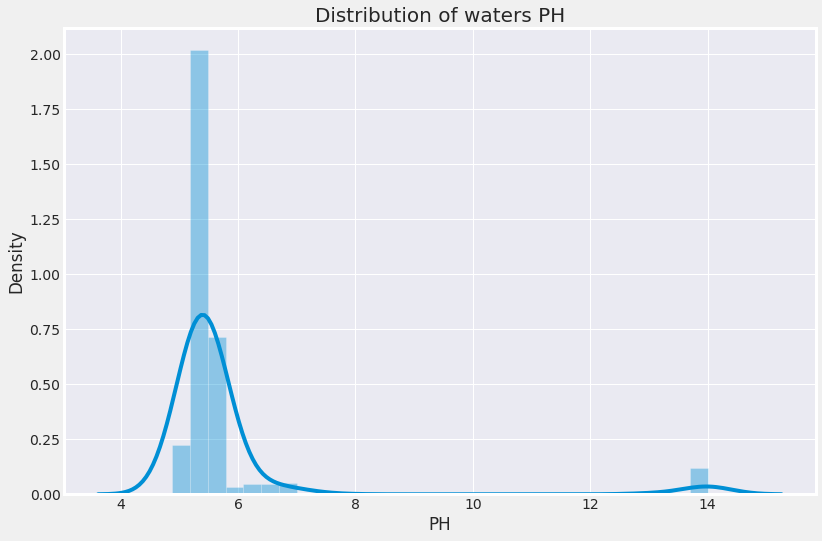

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.distplot(df['PH'], bins=30)
plt.title('Distribution of waters PH', fontsize = 20)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


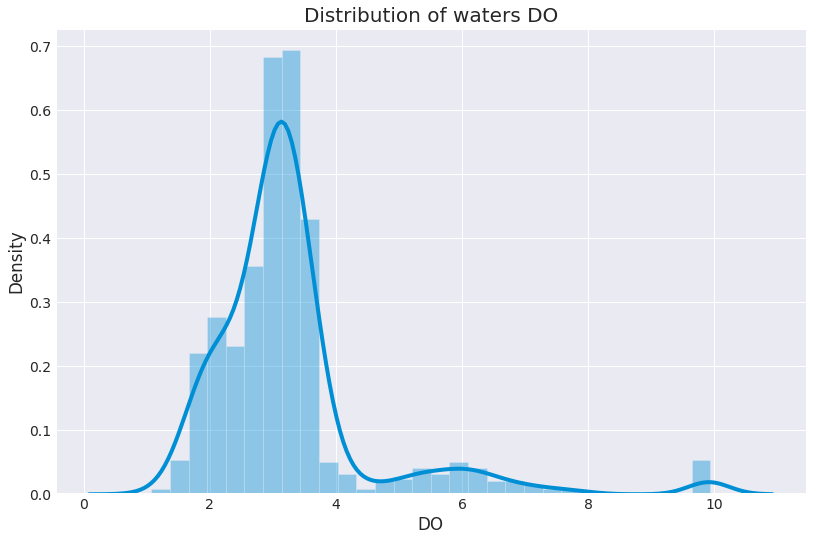

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.distplot(df['DO'], bins=30)
plt.title('Distribution of waters DO', fontsize = 20)
plt.show()

Splitting into training and test set
with test size of 20%

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y,
                                              test_size=0.2,
                                              random_state=42)

Shape of the dataset after splitting.

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(920, 3) (920,)
(230, 3) (230,)


In [ ]:
df.isnull().sum()

Time           0
Devicename     0
Temperature    0
TDS            0
PH             0
DO             0
dtype: int64

**WE are going to standardize the data so we can bring the values into same scale.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

1. **Linear Regressor model**

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [ ]:
# Fitting the model 
lin.fit(x_train, y_train)

LinearRegression()

In [ ]:
#saving prediction for future
y_pred =lin.predict(x_test)

In [ ]:
#score of the model
lin.score(x_train , y_train)

0.6531608540255595

In [ ]:
#score of the model
lin.score(x_test , y_test)

0.5229043279458958

In [ ]:
#r2 score of our model which explains the spread of target variable
from sklearn.metrics import r2_score
y_pred = lin.predict(x_test)
r2_score(y_test, y_pred)

0.5229043279458958

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5565004638570701
MSE: 0.6955963591997159
RMSE: 0.8340241958119176


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


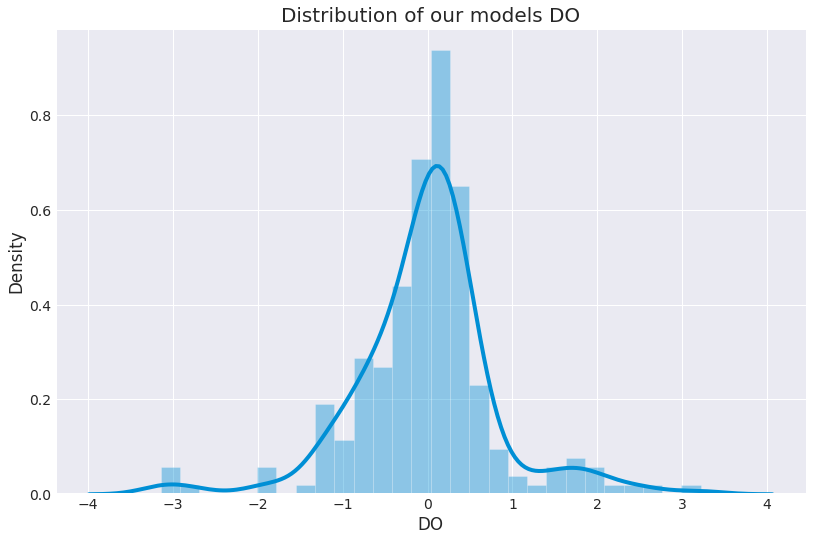

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(y_test-y_pred)

plt.title('Distribution of our models DO', fontsize = 20)
plt.show()

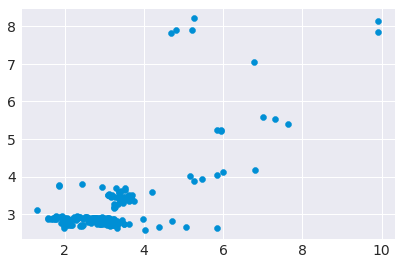

In [ ]:
plt.scatter(y_test, y_pred)

1. r2_score is significantly low.
2. mse and rmse are also high not good .

2. **Ridge Regression**


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=100)
ridge_model.fit(x_train,y_train)

Ridge(alpha=100)

In [ ]:
test_predictions = ridge_model.predict(x_test)

In [ ]:
r2_score(y_test, test_predictions)

0.5281782587786835

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test,test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 0.5568826700466454
MSE: 0.6879070689779798
RMSE: 0.8294016330933884


In [ ]:

from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.001,0.01,0.1,1.0,10.0),
           scoring="neg_mean_squared_error")
ridge_cv_model.fit(x_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
        scoring='neg_mean_squared_error')

In [ ]:
ridge_cv_model.alpha_

10.0

In [ ]:
prediction = ridge_cv_model.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.5564101793015296
MSE: 0.6943269001659393
RMSE: 0.8332628037815797


1. As we can see model doesnt performs good.
2. for the dataset because the rmse is high and r2 is low
as well mse is also 0.69...


3. Elastic Net using both l1 and l2 regularization

lets try regularization for the dataset might penalize the errors l1 and l2

In [ ]:
from sklearn.linear_model import ElasticNet
base_elastic_net_model = ElasticNet()
param_grid=  {'alpha':[0.1, 1, 5, 10, 50, 100],
              'l1_ratio':[.1, .5, .7, .95, 1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_model  = GridSearchCV(estimator = base_elastic_net_model ,
                           param_grid=param_grid,
                           cv = 5, verbose=2,
                           scoring='neg_mean_squared_error')

In [ ]:
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [ ]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [ ]:
y_pred = grid_model.predict(x_test)
from sklearn.metrics import mean_squared_error

0.6885861731626105

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5571156390583694
MSE: 0.6885861731626105
RMSE: 0.8298109261528258


1. Better then previous but still the rmse is high and mse too.
2. r2 score is high which is better but still not good as we might want.

4.SVM Regressor

In [ ]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf')
svm_reg.fit(x_train ,y_train)

SVR()

In [ ]:
y_pred = svm_reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8357496742620927

In [ ]:
svm_reg.score(x_train ,y_train)

0.8684065106139586

In [ ]:
svm_reg.score(x_test ,y_test)

0.8357496742620927

In [ ]:
#checking our model accuracy on mean error , mean squared error , root mean squared error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.33472831256917973
MSE: 0.2394738315037558
RMSE: 0.4893606354252003


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


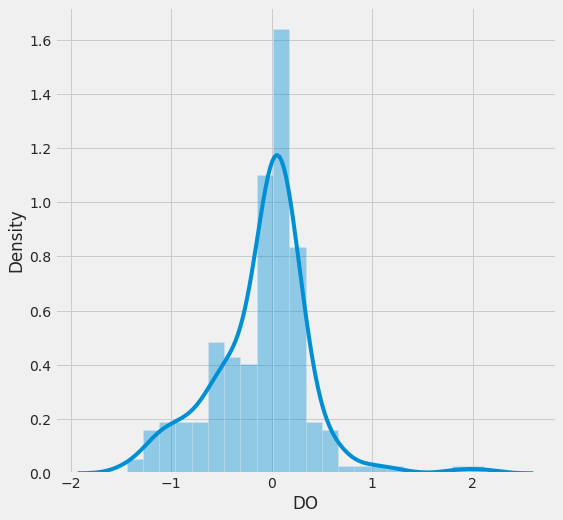

In [ ]:
plt.figure(figsize=(8, 8))
sns.distplot(y_test-y_pred)
plt.show()

1. Much better then any others till now lets.
2. Both mse and rmse are low.
3. r2_score is also high which is good indicator.

5. Decision Tree Regressor

In [ ]:
#preparing a decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train , y_train )
y_predict = DTree.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.6266249267692717

In [ ]:
DTree.score(x_train ,y_train)

0.9975316283090289

In [ ]:
DTree.score(x_test ,y_test)

0.6266249267692717

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=650, 
                                random_state=245, 
                                min_samples_leaf=.0001)
rf_model.fit(x_train, y_train)
y_predict = rf_model.predict(x_test)
r2_score(y_test, y_predict)

0.8489799665048323

In [ ]:
rf_model.score(x_train ,y_train)

0.9690188023461328

In [ ]:
rf_model.score(x_test ,y_test)

0.8489799665048323

In [ ]:
#checking our model accuracy on mean error , mean squared error , root mean squared error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.29446505701833575
MSE: 0.1560465217448144
RMSE: 0.3950272417755697


1. Both rmse and mse are low.
2. the training and test accuracy has quite big difference so we will try other algo.

6. **RandomForest Regressor**

In [ ]:
#importing regressor fitting it on our training data
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train ,y_train)

RandomForestRegressor()

In [ ]:
#predicting 
y_pred = reg.predict(x_test)

In [ ]:
reg.score(x_train ,y_train)

0.9890292387791915

In [ ]:
reg.score(x_test, y_test)

0.9038805317845425

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


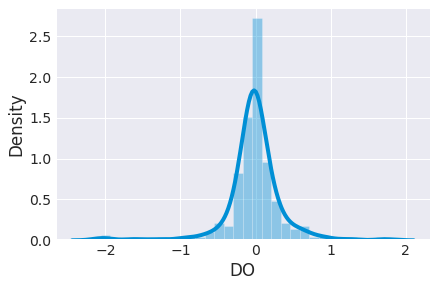

In [ ]:
sns.distplot(y_test-y_pred, bins=30)
plt.show()

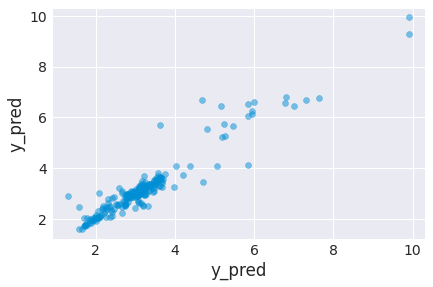

In [ ]:
#its linear that means our model is good
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_pred')
plt.ylabel('y_pred')
plt.show()

In [ ]:
#import the metrics 
from sklearn import metrics

In [ ]:
#checking our model accuracy on mean error , mean squared error , root mean squared error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.21012564073486906
MSE: 0.14014034512411772
RMSE: 0.3743532357601811


In [ ]:
metrics.r2_score(y_test, y_pred)

0.9038805317845425

Hyperparameter Tuning

In [ ]:
#its for findin hyperparameter parameters
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in three
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5,10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf = RandomizedSearchCV(estimator = reg,  param_distributions = random_grid, 
                        scoring='neg_mean_squared_error', 
                        n_iter = 10, cv = 5, verbose=2,
                        random_state=42, n_jobs = 1)

In [ ]:

#fit the model on our x_train, y_train 
rf.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
#best parameters for our model
rf.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
#prediction on test_set
prediction = rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


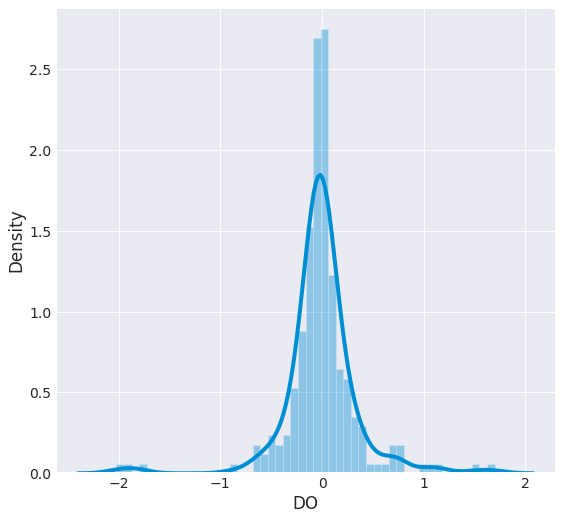

In [ ]:
plt.figure(figsize=(8, 8))
sns.distplot(y_test-prediction)
plt.show()

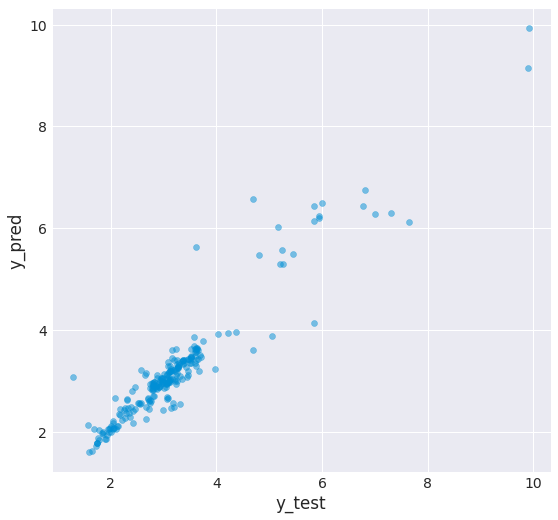

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.20974177392341795
MSE: 0.14120928674047598
RMSE: 0.3757782414409807





1. We can see that our model performs better with more complex models linear regression was not able to capture the patterns of the data.   
2. although we can do better I have tried Feature engineering 
from time feature but was not able to get good results so i dropped that feature.
3. As we can see the dataset is small but i tried to remove outliers with the help of interquartile range but this made my accuracy worse so decided to train model as it is.
4. I used log transformation too but it didnt result in any good performance....
5. RandomForest Regressor works better for our model given the circumstances as we can see that the RMSE value is 0.37 
6. Not much of difference between train and test accuracy score that means we are not overfitting.
7. We can clearly see that none of the other model were performing good, decision tree had a lot of difference between train and test scores....

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)